In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

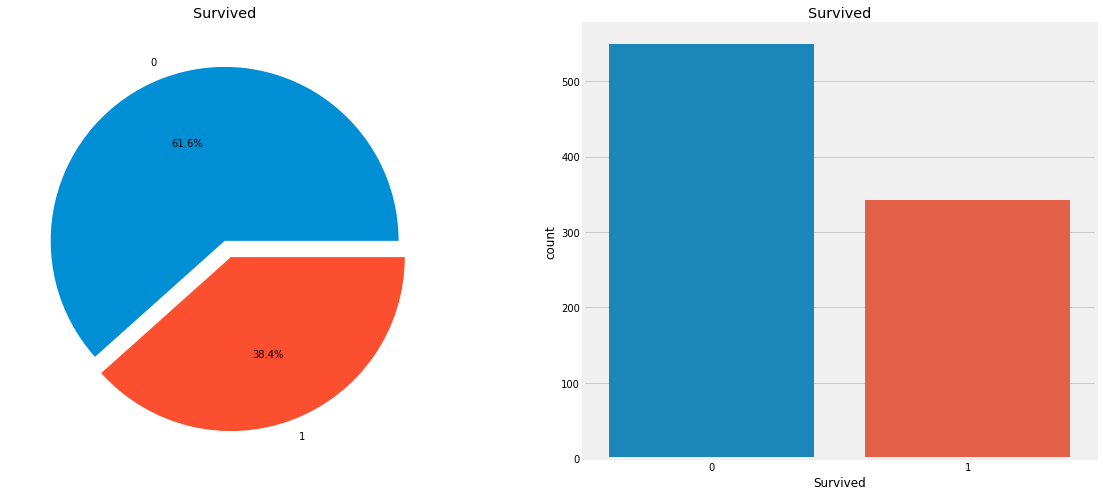

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

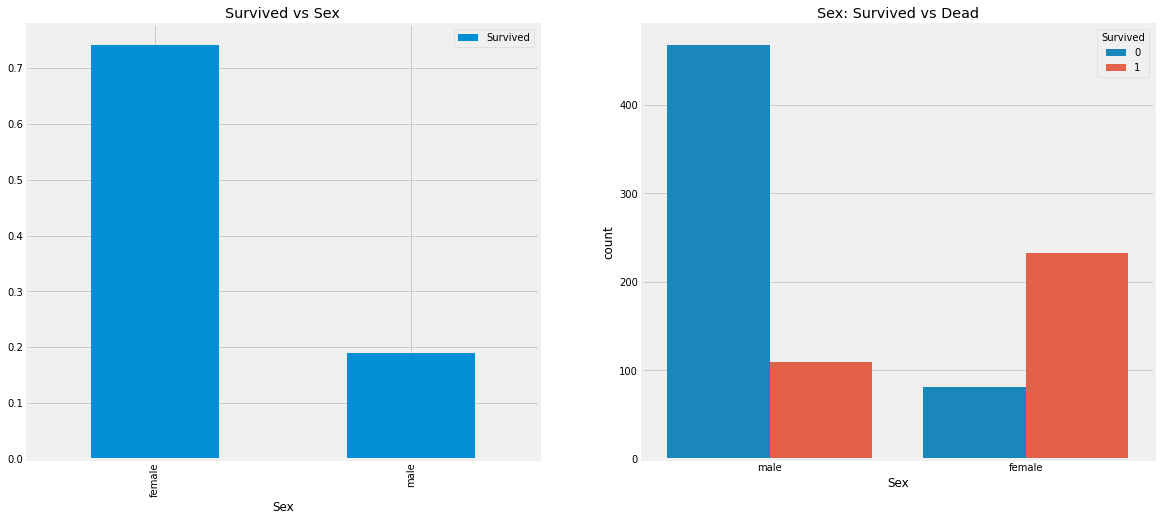

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


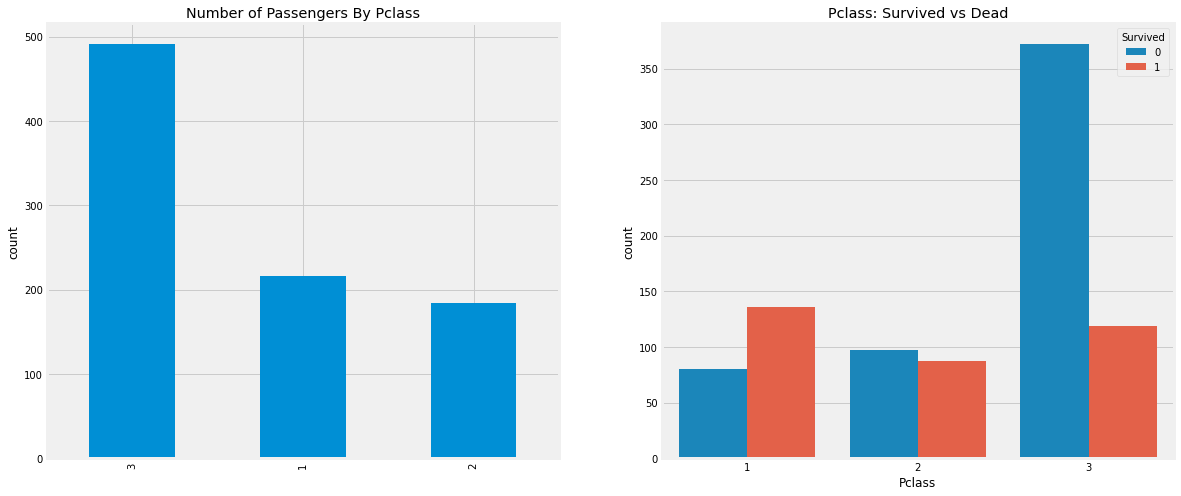

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', ax = ax[1], data = data)
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Pclass], data.Survived, margins = True).T

Sex      female          male            All
Pclass        1   2    3    1    2    3     
Survived                                    
0             3   6   72   77   91  300  549
1            91  70   72   45   17   47  342
All          94  76  144  122  108  347  891

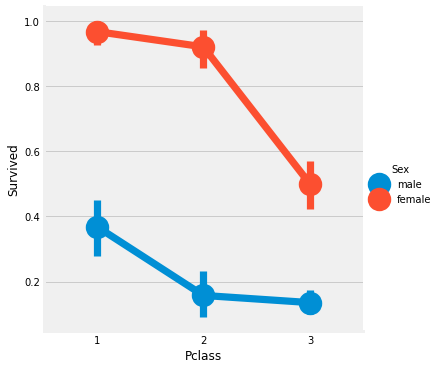

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

In [12]:
print('Old', data.Age.max())
print('young', data.Age.min())
print('mean', data.Age.mean())

Old 80.0
young 0.42
mean 29.69911764705882


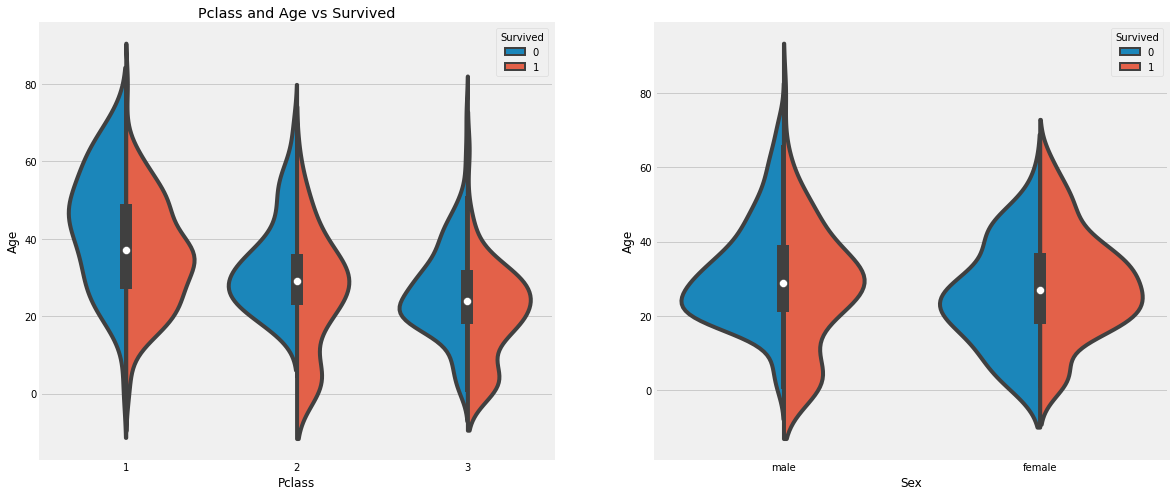

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
plt.show()

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial, data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [22]:
data.Age.isnull().any()

False

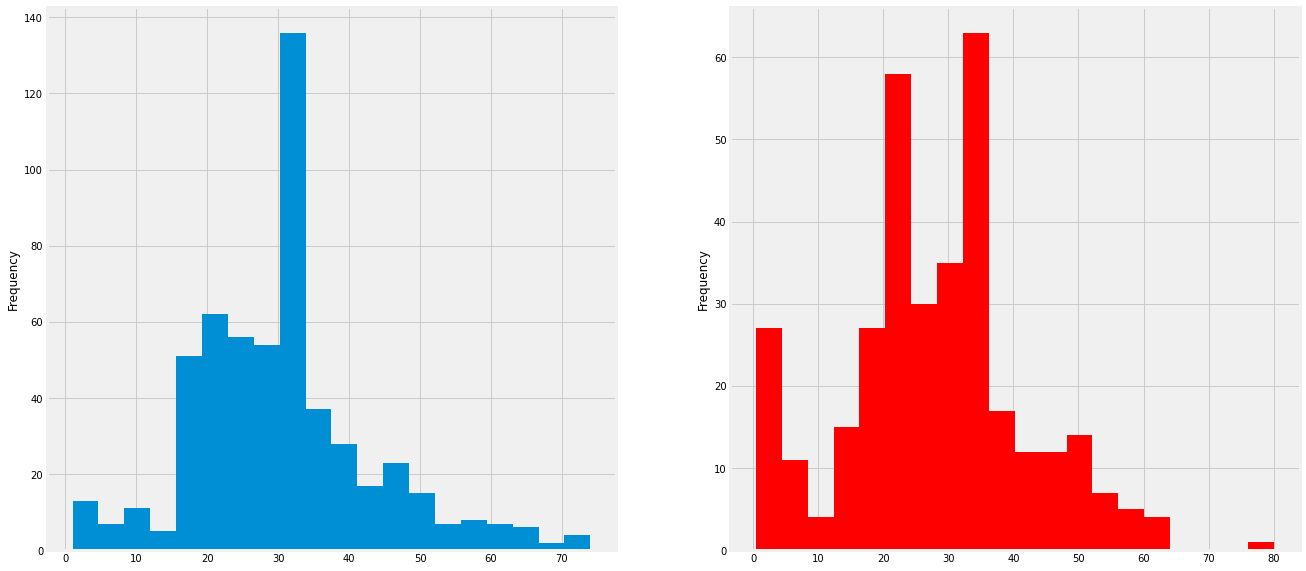

In [23]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data.loc[data.Survived == 0].Age.plot.hist(ax = ax[0], bins = 20)
data.loc[data.Survived == 1].Age.plot.hist(ax =ax[1], bins = 20, color = 'red')
plt.show()

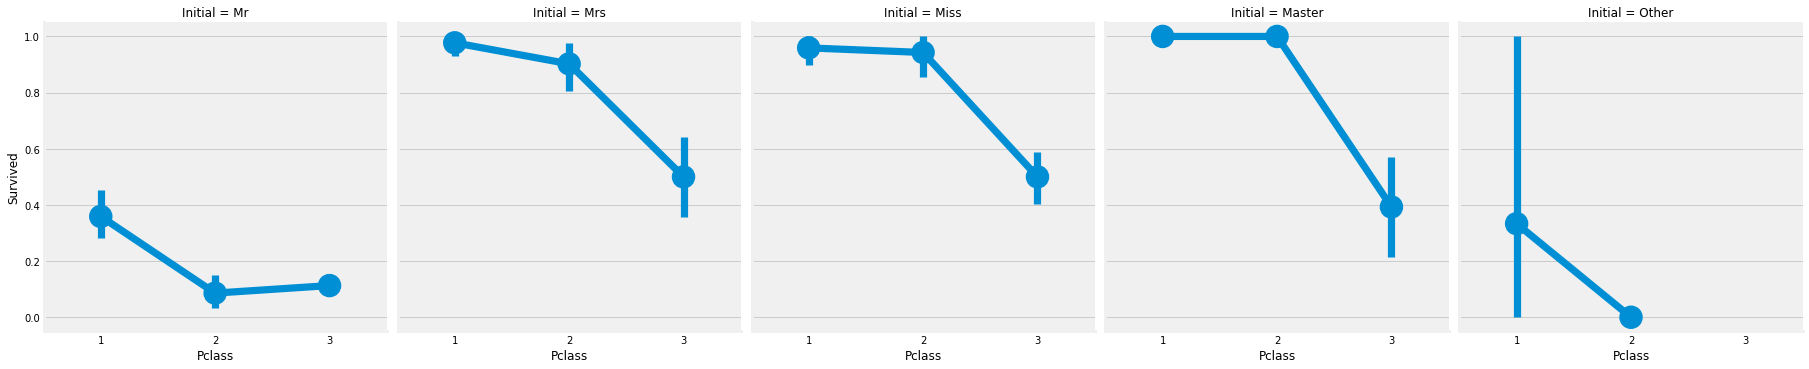

In [24]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

In [27]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

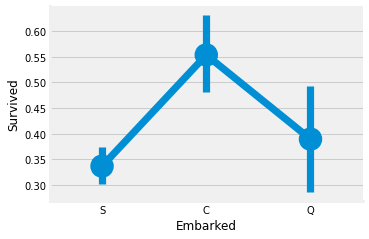

In [28]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

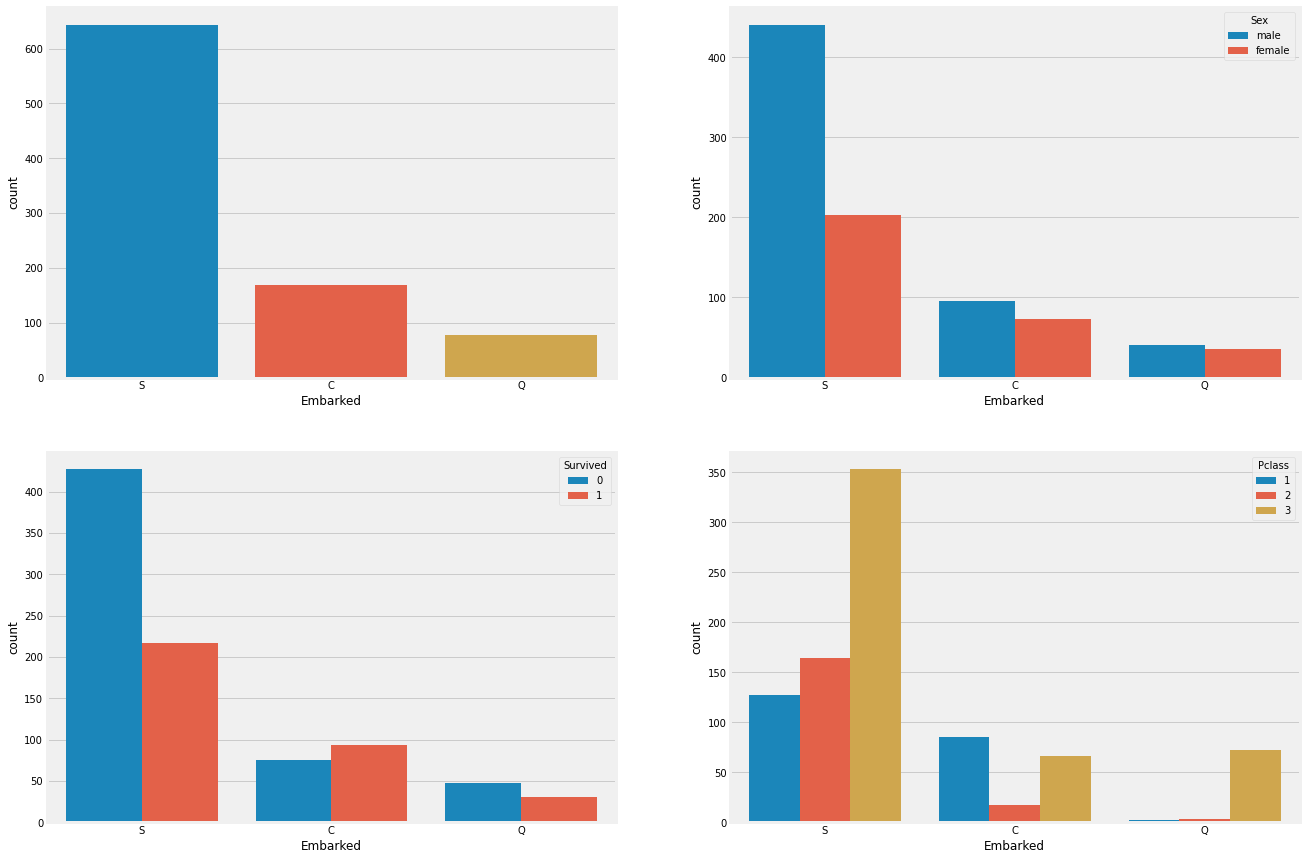

In [29]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
sns.countplot('Embarked', hue= 'Sex', data = data, ax = ax[0, 1])
sns.countplot('Embarked', hue = 'Survived', data =data, ax = ax[1, 0])
sns.countplot('Embarked', hue = 'Pclass', data= data, ax = ax[1, 1])
plt.show()

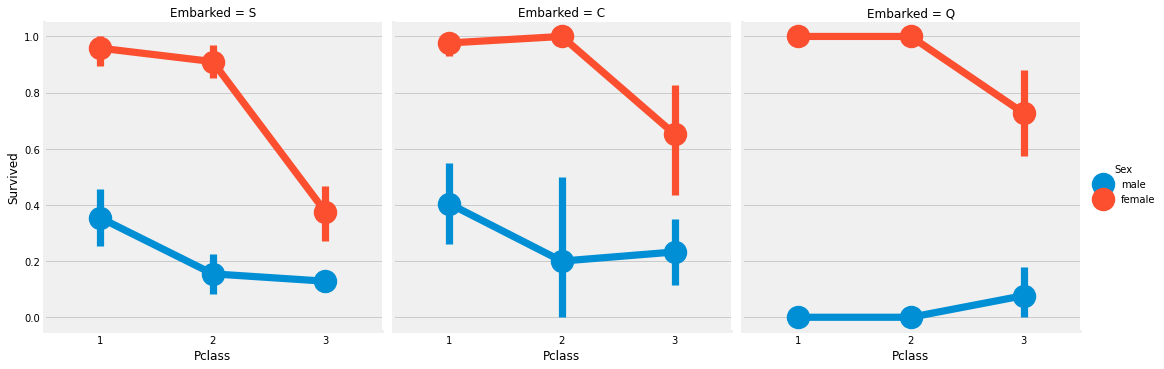

In [30]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

In [31]:
data['Embarked'].fillna('S', inplace = True)

In [32]:
data.Embarked.isnull().any()

False

In [33]:
pd.crosstab(data.SibSp, data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


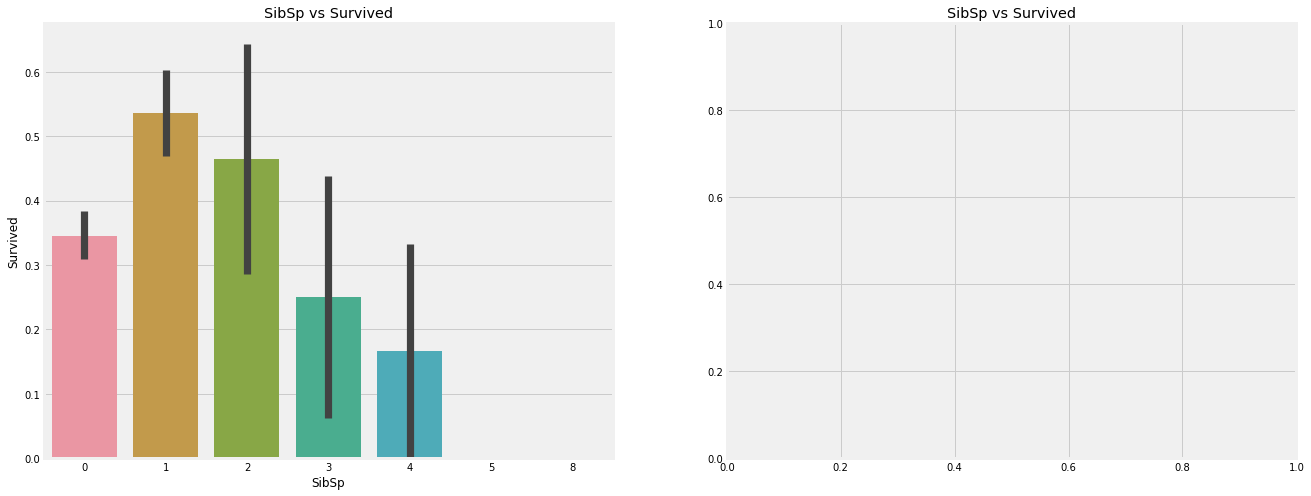

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [36]:
pd.crosstab(data.SibSp, data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [37]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


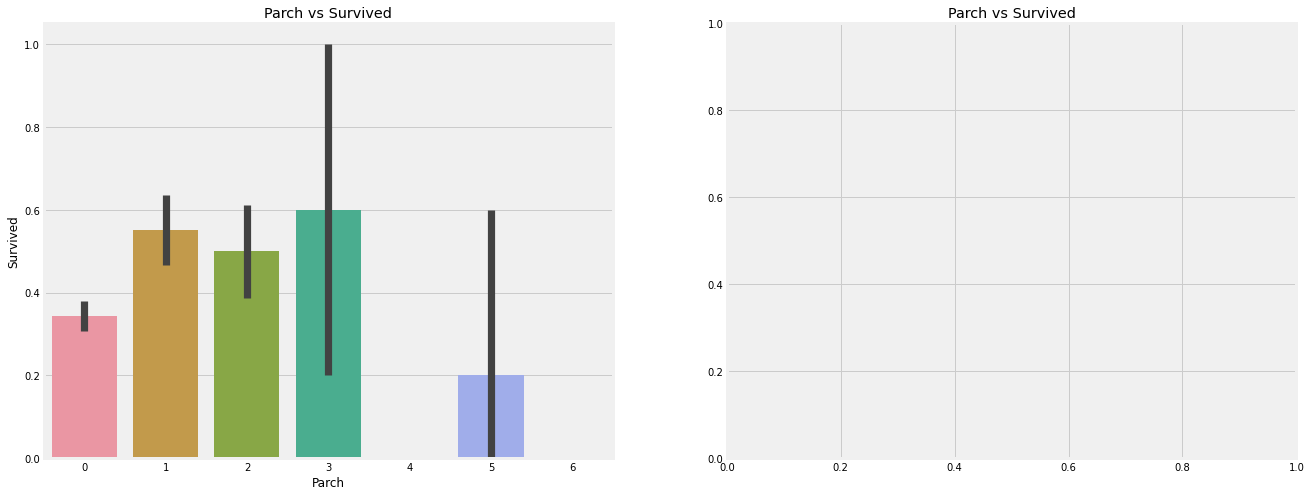

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [40]:
print('high', data.Fare.max())
print('low', data.Fare.min())
print('mean', data.Fare.mean())

high 512.3292
low 0.0
mean 32.204207968574636


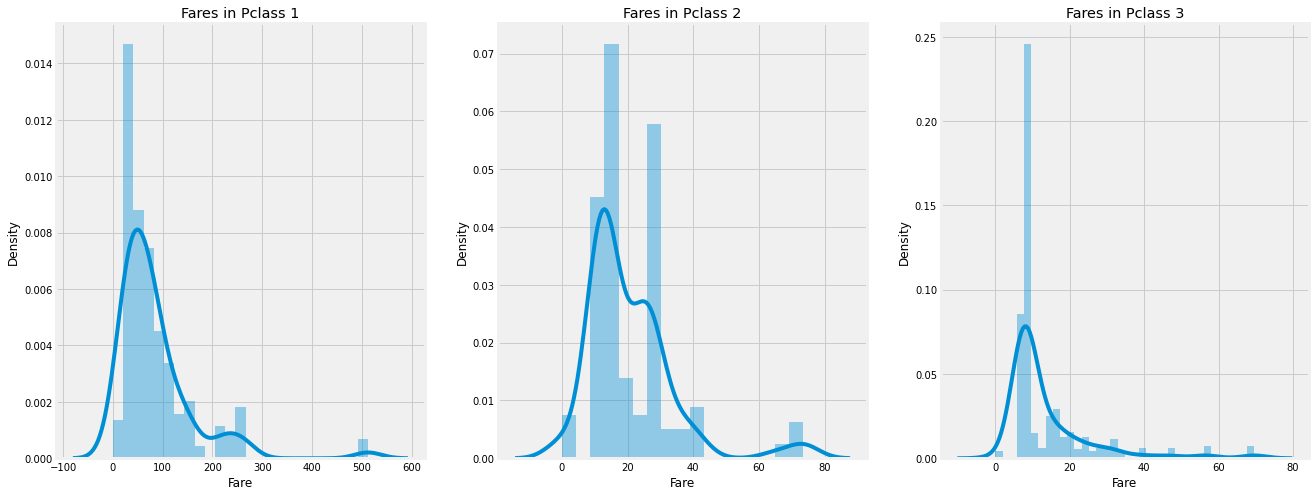

In [41]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

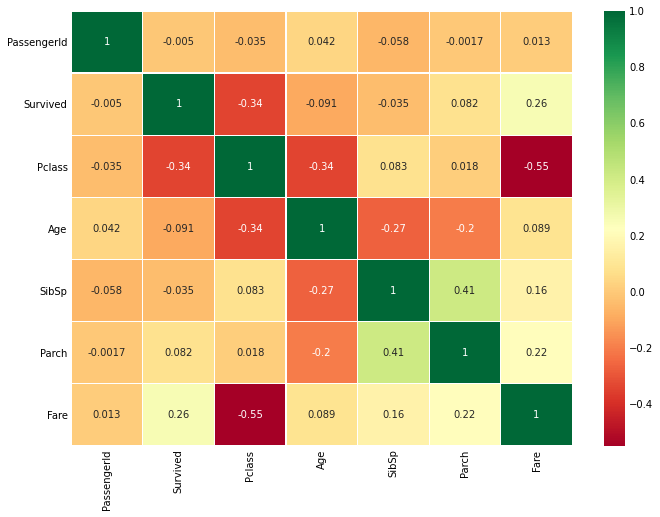

In [42]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [43]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [44]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


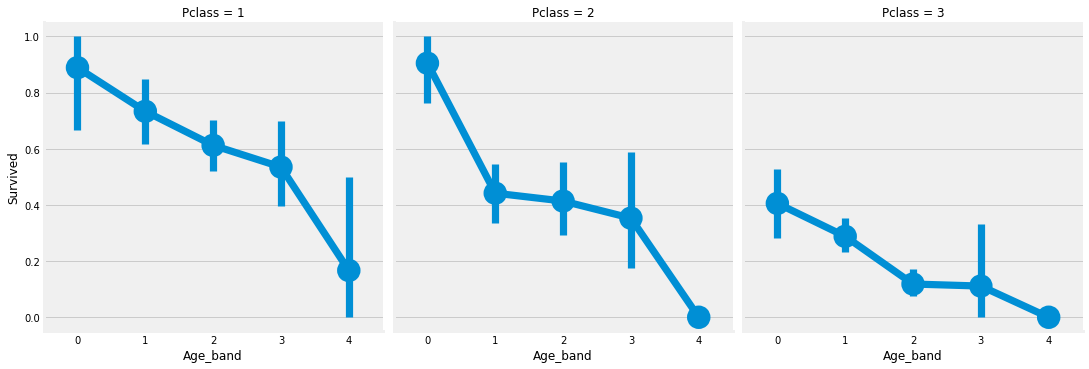

In [45]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

In [46]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

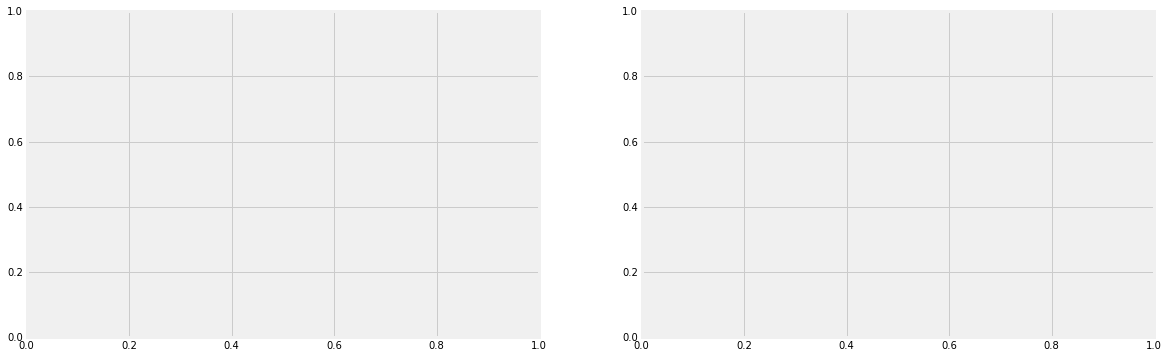

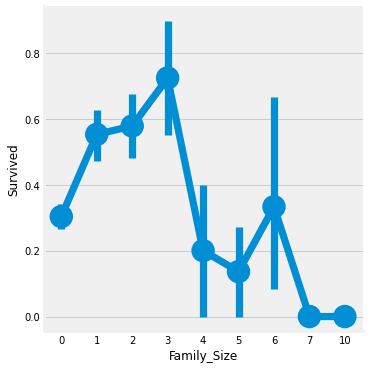

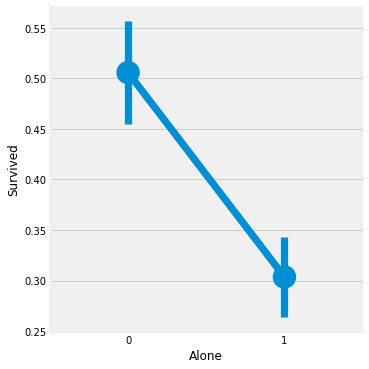

In [47]:
f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_Size', 'Survived', data = data, ax = ax[0])
sns.factorplot('Alone', 'Survived', data = data, ax = ax[1])
plt.show()

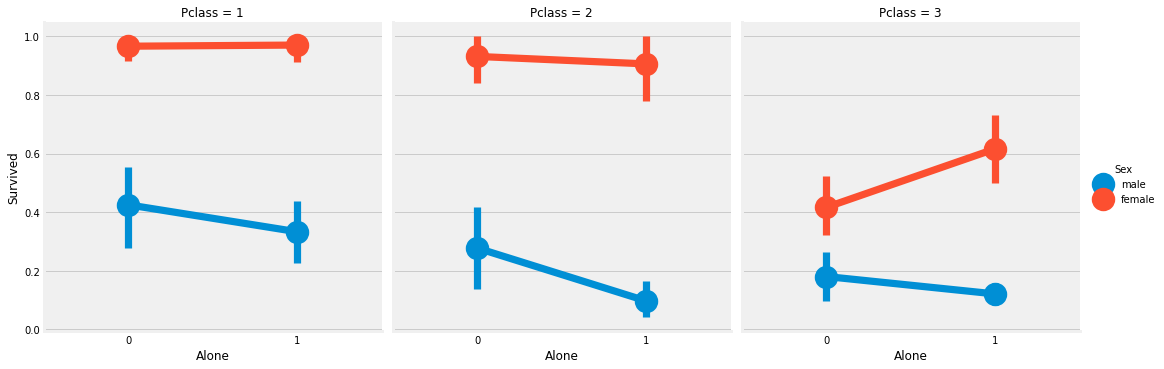

In [48]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

In [49]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [50]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

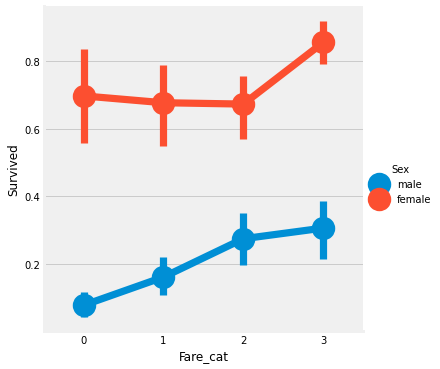

In [51]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

In [52]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

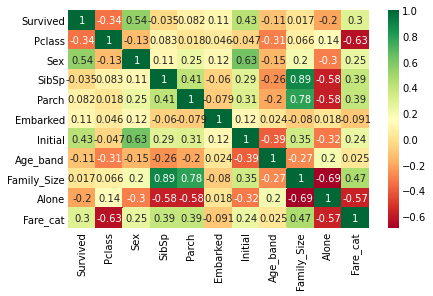

In [53]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
fig = plt.gcf()
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [55]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [56]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print(metrics.accuracy_score(prediction1, test_Y))

0.835820895522388


In [58]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print(metrics.accuracy_score(prediction2, test_Y))

0.8171641791044776


In [60]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(metrics.accuracy_score(prediction3, test_Y))

0.8134328358208955


In [61]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print(metrics.accuracy_score(prediction4, test_Y))

0.8059701492537313


In [62]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print(metrics.accuracy_score(prediction5, test_Y))

0.832089552238806


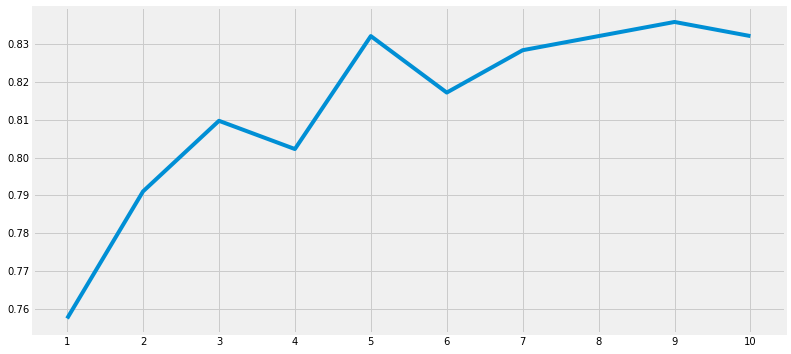

[0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] 0.835820895522388


In [65]:
index = list(range(1, 11))
a = pd.Series()
for i in index:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(index, a)
plt.xticks(index)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print(a.values, a.values.max())

In [66]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print(metrics.accuracy_score(prediction6, test_Y))

0.8134328358208955


In [67]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print(metrics.accuracy_score(prediction7, test_Y))

0.8208955223880597


In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits = 10, random_state = 22, shuffle = True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]
for model in models:
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std':std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.040287
Decision Tree,0.804732,0.045746
Naive Bayes,0.795843,0.054861
Random Forest,0.812622,0.044964


<AxesSubplot:>

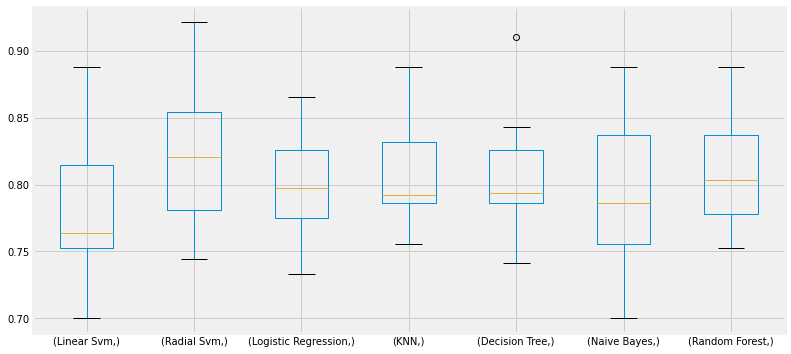

In [71]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

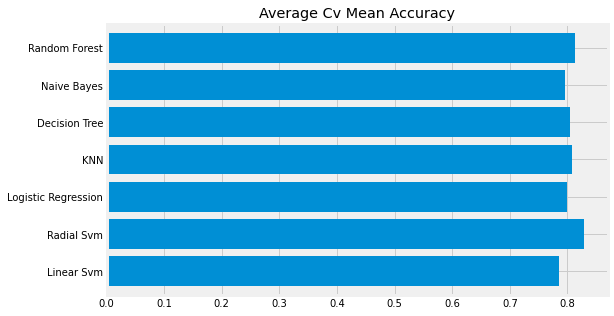

In [72]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average Cv Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

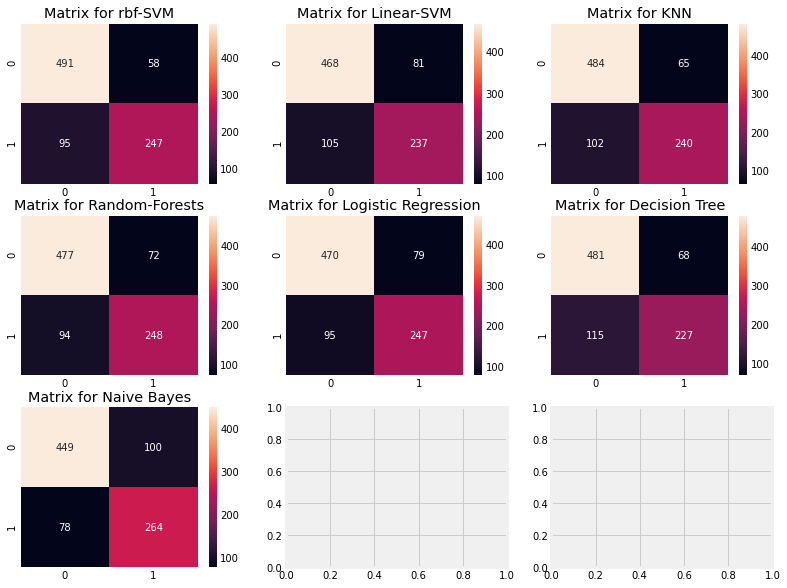

In [73]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [75]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [77]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], voting='soft').fit(train_X,train_Y)
print('accuracy: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print(cross.mean())

accuracy:  0.8208955223880597
0.8249188514357053


In [78]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring= 'accuracy')
print(result.mean())

0.835820895522388
0.8160424469413232


In [80]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state =0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print(result.mean())

0.8208955223880597
0.8171410736579275


In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print(result.mean())

0.8249188514357055


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring = 'accuracy')
print(result.mean())

0.8115230961298376


In [83]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring = 'accuracy')
print(result.mean())

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/envs/python_files/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/envs/python_files/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [84]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


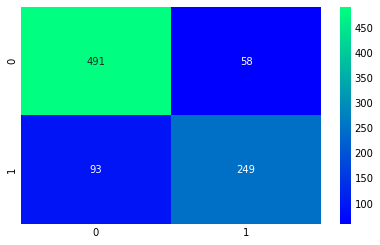

In [85]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

NameError: name 'xg' is not defined

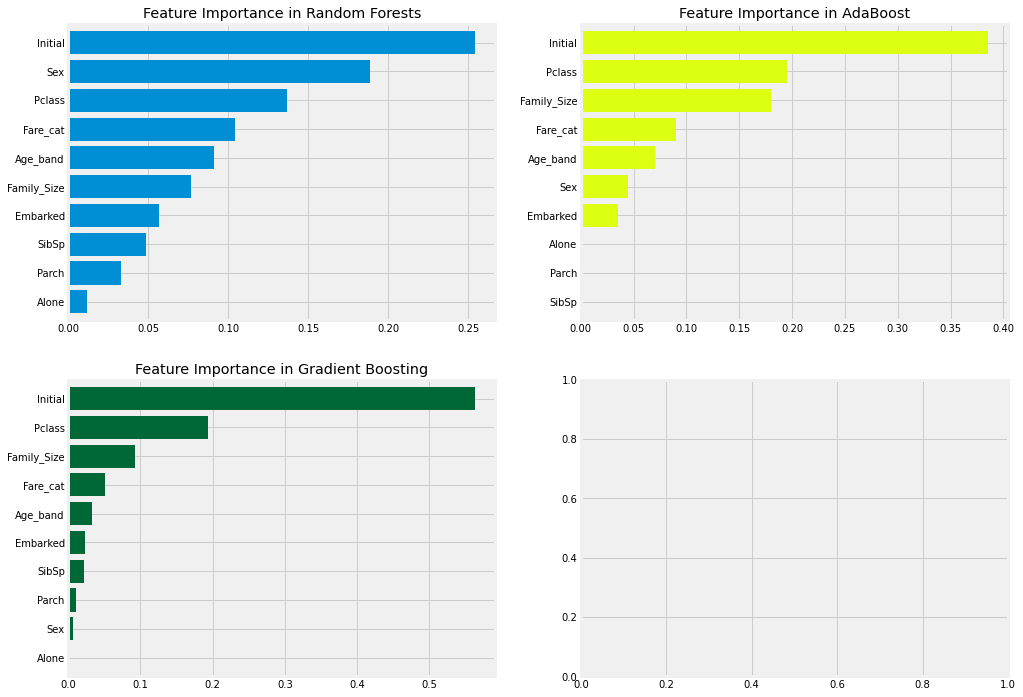

In [86]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()